In [0]:
#Import all of the necessary "background" data for the exercises


#Simulating a Mortgage Loan

One of the great milestones in life is when you finally buy your first home. But unless you've been wildly successful saving your money, you won't have the cash needed to pay for the entire purchase by yourself. You'll need to take out a **mortgage loan**, where you pay what you can afford as a down payment (typically 20% of the home price) and a bank lends you the balance. You then repay the bank (with interest) in monthly installments for a set period of time until the loan is paid off, often 30 years.

To calculate mortgage loan payments, we can use NumPy's .pmt() functionality to find out exactly what we owe each month given the loan amount, payment periods, and interest rate. Note that the interest rate we want to use here is a *monthly* rate, not the typical yearly rate the bank indicates.

To calculate this monthly rate, you perform the following calculation:

>Monthly Rate = (1 + Annual Rate)^(1/12) - 1

>For example, for a 5% annual rate the Monthly Rate = (1 + 0.05)^(1/12) - 1 = 1.0041 - 1 = 0.41%

Note that 0.41% is *not* the same rate as 5% / 12. This is because of the effect of our old friend compound interest! Now, let's try some exercises to work on our own mortgage mastery.

#Taking Out a Mortgage Loan

Congratulations! You've decided to purchase a studio apartment in Downtown Boston for the bargain price of $800,000.

You also had the great fortune of winning big on a scratch ticket you got at 7-Eleven, so you'll be able to make a 20% down payment on your new digs.

Import NumPy and set "home_value" equal to 800000 and "down_payment_percent" equal to 20%. Then, calculate the value of the down payment (labeled "down_payment") and the mortgage loan (labeled "mortgage_loan").

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.2

# Calculate the dollar value of the down payment
down_payment = home_value*down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value-down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


#Calculating the Monthly Mortgage Payment

Congratulations! You have been given a 30-year mortgage loan quote for your desired amount at 3.75%. The value of the mortgage loan is available as mortgage_loan.

In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.


Derive the equivalent monthly mortgage interest rate from the quoted annual mortgage_rate (Hint: You cannot simply divide by 12). Then, derive the number of "mortgage_payment_periods" (months) in the lifespan of the 30-year loan. Finally, calculate the value of your monthly mortgage payment using np.pmt().

In [2]:
import numpy as np
mortgage_rate = .0375
mortgage_rate_periodic = (1+mortgage_rate)**(1/12)-1
mortgage_payment_periods = 12*30
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


The more money you have for a down payment, the better - a higher down payment means a smaller mortgage loan, and a lower payment!

#Amortization, Interest and Principal
One important thing to remember is that not all mortgage payments are created equal. It's not so simple as "X dollars of my payment are for interest, and Y dollars are for the the principal." Early on, the majority of your monthly payment counts toward the interest on your loan rather than the principal, then the ratio changes over time according to the *amortization schedule*.

Remember your "For Loops?" You'll need them for the next few exercises!

#Calculating Interest and Principal Payments

Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

mortgage_loan, mortgage_rate_periodic, and periodic_mortgage_payment from the previous exercise are available for use.

Calculate the amount of the first loan payment that will go towards the mortgage interest based on the mortgage rate. Then, calculate the remaining amount of the first loan payment that will go towards the mortgage principal.

In [3]:
initial_interest_payment = mortgage_rate_periodic*mortgage_loan
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))
initial_principal_payment = periodic_mortgage_payment-initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


#Simulating Periodic Payments (I)
Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. You will now write a simple program to calculate the interest and mortgage portions of each payment over time.

The new "principal_remaining" variable is initialized as an array of 0's with length equal to the number of payment periods.

In [0]:
# Loop through each mortgage payment period
principal_remaining = [0] * 3600
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = previous_principal_remaining - principal_payment

#Simulating Periodic Payments (II)

You have decided to extend your program from the previous exercise to store the principal and interest payments made at each period, and to plot the results instead of simply printing them.

For this example, the plotting code is already done, so you just need to finish the logic inside the for loop and the initialization of the variables which will be updated at each iteration.

Simply store the interest_paid and principal_paid for each time period. Then, calculate the principal_remaining for each time period based on the principal payment and the remaining principal. Run the provided code to plot the monthly Interest vs Principal payments.

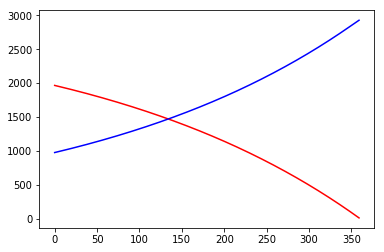

In [5]:
# Loop through each mortgage payment period
interest_paid = []
principal_paid = []
principal_remaining = []
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining * mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid.append(interest_payment)
    principal_paid.append(principal_payment)
    principal_remaining.append(previous_principal_remaining - principal_payment)
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.show()

#Home Ownership, Home Prices and Recessions

Home ownership doesn't always work out how we hope. If home values fall - like they did during the U.S. financial crisis in 2007-08 - you may find your mortgage *underwater*, which means the amount you owe on the mortgage exceeds the value of your home. When this happens, the best course of action is to either "stay the course" and hope home prices rally, or refinance your mortgage to get a better rate.

We'll use the NumPy .cumsum() and .cumprod() functions to forecast cumulative growth.

You are faithfully paying your mortgage each month, but it's difficult to tell how much of the house you actually own and how much interest you have paid in total over the years.

Use np.cumsum() to add up all the interest payments and also to add up all the principal payments over time to see how your ownership changes over time.

Recall that np.cumsum() performs a cumulative sum over time. Return a series of iterative sums instead of just a single number.

principal_paid, interest_paid, home_value and down_payment_percent from the previous exercise are available.

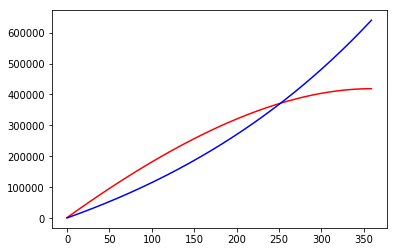

In [15]:
import numpy as np

# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.show()

Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called growth_array.

The home_value and cumulative_percent_owned variables from the previous exercise are available.

In [0]:
growth_array = np.empty(360,)

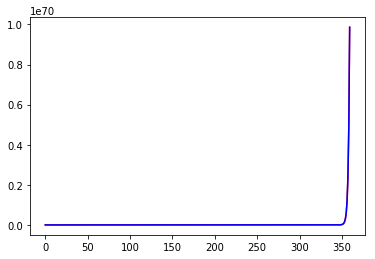

In [16]:
import numpy as np

# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned * home_value_forecast

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
plt.show()

#Falling Housing Prices and Underwater Mortgages
In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

The outstanding principal on the mortgage is available as principal_remaining.

Forecast the home value over time using a simple operation between the cumulative_decline_forecast array and the initial home_value. Calculate where the mortgage is underwater at each time period, storing an array of boolean values when the condition is true or false. Finally, run the existing code to plot the home value vs. principal remaining over time.

In [0]:
decline_array = np.empty(360,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


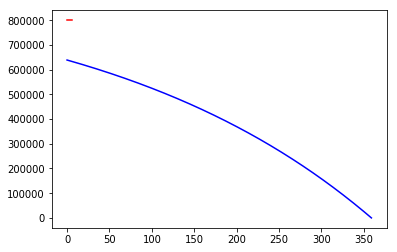

In [13]:
import numpy as np
import pandas as pd

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = cumulative_decline_forecast*home_value

# Find all periods where your mortgage is underwater
underwater = (home_value_forecast-principal_remaining)<0
pd.value_counts(underwater)

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.show()